In [1]:
import os 
train_img       =   "selected_data/annotations"
train_ano       =   "selected_data/png_ano/"


In [2]:
from keras_segmentation.models.unet import resnet50_unet

model = resnet50_unet(n_classes=5 ,  input_height=512, input_width=512)

In [4]:
model.train(
    train_images =  "train_img",
    train_annotations = "train_ano",
    checkpoints_path = "checkpoints" , epochs= 8 )

Verifying train dataset


  0%|          | 0/8000 [00:00<?, ?it/s]


AssertionError: The pixel values of seg image should be from 0 to 4 . Found pixel value 6

In [4]:
out = model.predict_segmentation(
    inp="train_img/PMC1064074_table_0.jpg",
    out_fname="out.png")

1/1 [==============================] - 2s 2s/step


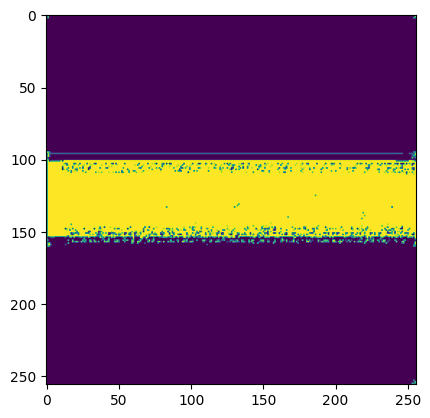

In [5]:
import matplotlib.pyplot as plt
plt.imshow(out)

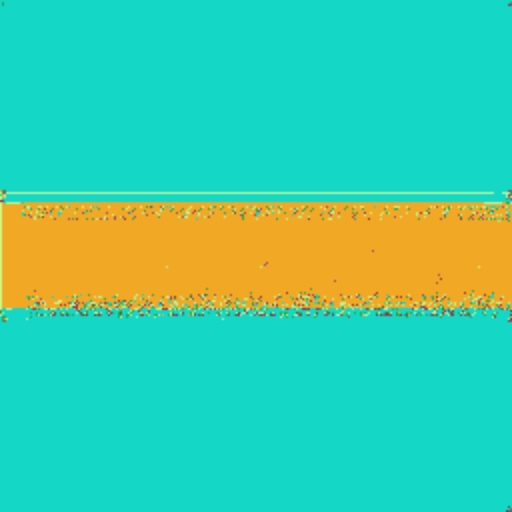

In [6]:
from IPython.display import Image
Image('out.png')

In [7]:
overlay_img = True

# Show class legends
show_legends = True

# Specify the class names
class_names = ["table", "table column header", "table row", "table column", "table spanning cell", "table projected row header"]

In [10]:
input_image_path = "train_img/PMC1064074_table_0.jpg"
output = model.predict_segmentation(
        inp=input_image_path,
        out_fname="out.png",
        
        
        class_names=["table", "table column header", "table row", "table column", "table spanning cell", "table projected row header"]
)

TypeError: predict() got an unexpected keyword argument 'class_names'

In [16]:
import cv2
image="selected_data/processed_images/PMC1064094_table_0.jpg"
mask="selected_data/png_ano/PMC1064094_table_0.png"
# Apply the mask to the image
masked_image = cv2.bitwise_and(image, mask)

# Display the original image, mask, and masked image
cv2.imshow('Original Image', image)
cv2.imshow('Mask', mask)
cv2.imshow('Masked Image', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - src1 is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src1'


In [17]:
import cv2
import numpy as np

# Load the original image and the mask image
image = cv2.imread('selected_data/processed_images/PMC1064094_table_0.jpg')
mask = cv2.imread('selected_data/png_ano/PMC1064094_table_0.png', cv2.IMREAD_GRAYSCALE)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)

# Display the original image, mask, and masked image
cv2.imshow('Original Image', image)
cv2.imshow('Mask', mask)
cv2.imshow('Masked Image', masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
